<a href="https://colab.research.google.com/github/Lucasmsorretino/TrabArqDados/blob/atividade_2_cogumelo/trab2_mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 02 - melhorar o desempenho de RP em conjunto de dados existentes

A atividade 02 visa trabalhar com um conjunto de dados pré-construído, onde as opções que o desenvolvedor tem, são de aplicar as técnicas de pré-processamento abaixo relacionadas:


Base de dados escolhida: Secondary Mushroom
Link: https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

Sobre a base de dados:

Esta base de dados foi criada com a finalidade de simular e fornecer um conjunto de dados maior e mais variado de cogumelos hipotéticos para tarefas de aprendizado de máquina e análise de dados, inspirado não Conjunto de Dados de Cogumelos original de J. Schlimmer.

url:https://archive.ics.uci.edu/ml/datasets/Mushroom.

Este conjunto de dados inclui 61069 cogumelos hipotéticos com Píleo (chapéus do cogumelo) baseado em 173 espécies (353 cogumelos por espécie). Cada cogumelo é identificado como definitivamente comestível, definitivamente venenoso ou com classificação duvidosa e não recomendado para consumo (esta última classe combinada com a classe de cogumelos venenosos).

Descrição dos dados:

| Variável             | Papel     | Tipo       | Descrição                         | Unidade | Valores ausentes |
|----------------------|-----------|------------|-----------------------------------|---------|------------------|
| class                | Classe    | Categórico | Target (p venenoso, e comestível) | -       | não              |
| cap-diameter         | Atributo  | Contínuo   | diâmetro do píleo                 | cm      | não              |
| cap-shape            | Atributo  | Categórico | formato do píleo                  | -       | não              |
| cap-surface          | Atributo  | Categórico | superfície do píleo               | -       | sim              |
| cap-color            | Atributo  | Categórico | cor do píleo                      | -       | não              |
| does-bruise-or-bleed | Atributo  | Categórico | cogumelo machuca ou sangra        | -       | não              |
| gill-attachment      | Atributo  | Categórico | posição da lamela                 | -       | sim              |
| gill-spacing         | Atributo  | Categórico | espaçamento da lamela             | -       | sim              |
| gill-color           | Atributo  | Categórico | cor da lamela                     | -       | não              |
| stem-height          | Atributo | Contínuo   | altura da haste                   | cm      | não              |
| stem-width           | Atributo | Contínuo | largura da haste                  | mm      | não              |
| stem-root            | Atributo | Categórico | tipo de raíz                      | -       | sim              |
| stem-surface         | Atributo | Categórico | superfície da haste               | -       | sim              |
| stem-color           | Atributo | Categórico | cor da haste                      | -       | não              |
| veil-type            | Atributo | Categórico | tipo de véu                       | -       | sim              |
| veil-color           | Atributo | Categórico | cor do véu                        | -       | sim              |
| has-ring             | Atributo | Categórico | possuie anel                      | -       | não              |
| ring-type            | Atributo | Categórico | tipo de anel                      | -       | sim              |
| spore-print-color    | Atributo | Categórico | cor da marca de esporos           | -       | sim              |
| habitat              | Atributo | Categórico | habitat (onde cresce)             | -       | não              |
| season               | Atributo | Categórico | estação do ano                    | -       | não              |

In [37]:
# execute pip install ucimlrepo no terminal para instalar o pacote da uci e baixar os dados.
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

# data (as pandas dataframes)
X = secondary_mushroom.data.features
y = secondary_mushroom.data.targets

print(secondary_mushroom.data.original.head())

  class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p         15.26         x           g         o                    f   
1     p         16.60         x           g         o                    f   
2     p         14.07         x           g         o                    f   
3     p         14.17         f           h         e                    f   
4     p         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
0               e          NaN          w        16.95  ...          s   
1               e          NaN          w        17.99  ...          s   
2               e          NaN          w        17.80  ...          s   
3               e          NaN          w        15.77  ...          s   
4               e          NaN          w        16.53  ...          s   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0            y   

In [3]:
len(secondary_mushroom.data.original)
# Vai precisar:
# codificação
# limpeza ?
# normalização maybe
# coreeção de prevaência, 27k de comestivel contra 33 de venenoso
y.value_counts()

,count
class,
p,33888
e,27181


## Considerações sobre a característica dos dados:

* A grande maioria dos atributos são do tipo nominal. Logo será necessário aplicar a técnica de codificação para usar em algorítmos de ML tais como o SVM.
* Alguns atributos possuem valores faltantes em uma proporção significativa. Nos casos em que a quantidade excede os 40%, adotaremos uma estratégia para eliminar a feature do modelo. Segue abaixo a taxa de proporção de dados faltantes para os atributos marcados como portadores de NaN.

In [12]:
total_samples = X.shape[0]
attributes_with_missing_values = ['cap-surface', 'gill-attachment', 'gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'ring-type', 'spore-print-color']
for attribute in attributes_with_missing_values:
    print(f"Attribute: {attribute} has {(X[attribute].isna().sum() / total_samples)*100:.2f}% missing values")

Attribute: cap-surface has 23.12% missing values
Attribute: gill-attachment has 16.18% missing values
Attribute: gill-spacing has 41.04% missing values
Attribute: stem-root has 84.39% missing values
Attribute: stem-surface has 62.43% missing values
Attribute: veil-type has 94.80% missing values
Attribute: veil-color has 87.86% missing values
Attribute: ring-type has 4.05% missing values
Attribute: spore-print-color has 89.60% missing values


### Estratégia 1 - Eliminar atributos com taxa elevada de dados faltantes

Neste caso, optamos por eliminar os seguintes atributos do modelo por entender que estes agregam pouca informação:
1. veil-type
2. veil-color
3. spore-print-color
4. stem-root
5. stem-surface
6. gill-spacing

Como todos eles são nominais, fica um tanto complexo substituir por valores como média e mediana. Substituir estes pela moda ou valores aleatórios também não parece fazer sentido para estes atributos.

In [13]:
columns_to_drop = ['veil-type', 'veil-color', 'spore-print-color', 'stem-root', 'stem-surface', 'gill-spacing']
cleaned_df = X.drop(columns=columns_to_drop)

## Estratégia 2 - Eliminar linhas com atributos faltantes

Como o atributo ring-type possui dados faltantes em < 5% dos amostras, podemos eliminar as linhas que possuem esta coluna incompleta do modelo

In [14]:
lines_to_drop = cleaned_df[cleaned_df['ring-type'].isna()].index
cleaned_df = cleaned_df.drop(lines_to_drop, axis=0)

## Estratégia 3 - Fazer inputação em atributos entre 15% e 25% de informações faltantes

Agora que os atributos com excesso de dados faltantes foram eliminados e os registros com atributos ring-type faltantes foram eliminados, optamos por fazer a inputação de dados nos atributos cap-surface e gill-attachment, com 23% e 16% de valores ausentes respectivamente. Optamos por preencher os dados faltantes de cada atributo pela moda de cada um deles.

In [15]:
mode_cap_surface = cleaned_df['cap-surface'].mode()
mode_gill_attachment = cleaned_df['gill-attachment'].mode()
print(f"mode_cap_surface is unique? {len(mode_cap_surface) == 1}. Values is(are): {mode_cap_surface}")
print(f"mode_gill_attachment is unique? {len(mode_gill_attachment) == 1}. Values is(are): {mode_gill_attachment}")

mode_cap_surface is unique? True. Values is(are): 0    t
Name: cap-surface, dtype: object
mode_gill_attachment is unique? True. Values is(are): 0    a
Name: gill-attachment, dtype: object


As modas em ambas as colunas são únicas. ENtão fica mais fácil substituir as ocorrências de NaN com os valores obtidos (substituição única).

In [19]:
cleaned_df['cap-surface'] = cleaned_df['cap-surface'].fillna('t')
cleaned_df['gill-attachment'] = cleaned_df['gill-attachment'].fillna('a')

## Estratégia 4 - Codificação dos atributos nominais

Agora que fizemos a limpeza dos dados, partimos para codificação dos atributos nominais. Usamos a codificação one-hot encoding pois os atributos não possuem uma ordenação, sendo cada valor uma classificação.

In [21]:
categorical_cols = cleaned_df.select_dtypes(include=['object']).columns
print("Categorical columns to encode:", categorical_cols)

encoded_df = pd.get_dummies(cleaned_df, columns=categorical_cols, dummy_na=False)

display(encoded_df.head())

Categorical columns to encode: Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season'],
      dtype='object')


,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,15.26,16.95,17.09,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,16.60,17.99,18.19,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,14.07,17.80,17.74,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,14.17,15.77,15.98,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,14.64,16.53,17.20,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


## Treinar modelo com o SVM

Agora que preparamos os dados, podemos treinar um modelo com o SVM para detectarmos quando um cogumelo é venenoso ou não baseado nos atributos.

Como apagamos algumas linhas na seção Estratégia 2, precisamos criar uma versão da Series de target sem os valores da linhas apagadas também.

In [24]:
y_cleaned = y.drop(lines_to_drop, axis=0)

Na sequência iremos, separar um conjunto de dados de treino e de teste. Iremos usar a proporção 80/20 entre treinamento e teste.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df, y_cleaned, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (46878, 89)
Shape of X_test: (11720, 89)
Shape of y_train: (46878, 1)
Shape of y_test: (11720, 1)


Em seguida, iremos treinar o modelo e tirar a matriz do confusão em cima dos dados de treinamento.

In [28]:
alg = svm.SVC()
model = alg.fit(X_train, y_train)

# predição com os mesmos dados usados para treinar
y_pred = model.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred)
print('Matriz de confusão - com os dados usados no TREINAMENTO')
print(cm_train)
print(classification_report(y_train, y_pred))

Matriz de confusão - com os dados usados no TREINAMENTO
[[18345  2321]
 [ 2182 24030]]
              precision    recall  f1-score   support

           e       0.89      0.89      0.89     20666
           p       0.91      0.92      0.91     26212

    accuracy                           0.90     46878
   macro avg       0.90      0.90      0.90     46878
weighted avg       0.90      0.90      0.90     46878



Informação importante para uso posterior: do jeito que tá demorou +/- uns 5-10 minutos no google colab para treinar o modelo. Agora vamos validá-lo modelo com os dados de teste.

In [30]:
# predição com os mesmos dados usados para testar
print('Matriz de confusão - com os dados usados para TESTES')
y2_pred = model.predict(X_test)
cm_test = confusion_matrix(y_test, y2_pred)
print(cm_test)
print(classification_report(y_test, y2_pred))

Matriz de confusão - com os dados usados para TESTES
[[4467  636]
 [ 557 6060]]
              precision    recall  f1-score   support

           e       0.89      0.88      0.88      5103
           p       0.91      0.92      0.91      6617

    accuracy                           0.90     11720
   macro avg       0.90      0.90      0.90     11720
weighted avg       0.90      0.90      0.90     11720



Para os dados de teste os resultados foram 89% de precisão para as detecção de cogumelos comestíveis e 91% para a deteção de cogumelos venenosos. A sensibilidade (recall) para estas classes também foram de 88% e 91% respectivamente, o que justifica os F1-scores elevado.

No entanto, ainda cabe mais algumas otimizações no modelo que podem ser feita afim e deixar os dados mais adequados para o treinamento no SVM.

## Otimização 1 - Adequação da escala dos atributos contínuos

Os atributos contínuos cap-diameter (diâmetro do píleo) e stem-height (altura da haste) estão em centímetros, enquanto que o atributo stem-width(largua da haste) estão em milímetros. Para otimizar a performance do algorítmo seria interessante padronizar a dimensão de comprimento deste conjunto de dados para trabalhar tudo com milímetros (mm), ou centímetros (cm). Optamos por alterar os atributos cap-diameter e stem-height para milímetros.

In [32]:
encoded_df['cap-diameter'] = encoded_df['cap-diameter'] * 10.0
encoded_df['stem-height'] = encoded_df['stem-height'] * 10.0

print(encoded_df['cap-diameter'].sample(n=3))
print(encoded_df['stem-height'].sample(n=3))

22699    745.0
33747    661.0
55832    690.0
Name: cap-diameter, dtype: float64
39630    58.7
26420    59.7
34476    79.6
Name: stem-height, dtype: float64


## Otimização 2 - Normalização dos atributos contínuos

Os atributos cap-diamater (diâmetro do píleo), stem-height (altura da haste) e stem-width (largura da haste) são dados contínuos que podem ser normalizados ou padronizados para otimizar a execução do SVM. Para decidirmos entre a normalizão ou padronização, vamos tentar validar se os atributos contínuos possuem uma distribuição normal.

### Atributo - cap-diameter:

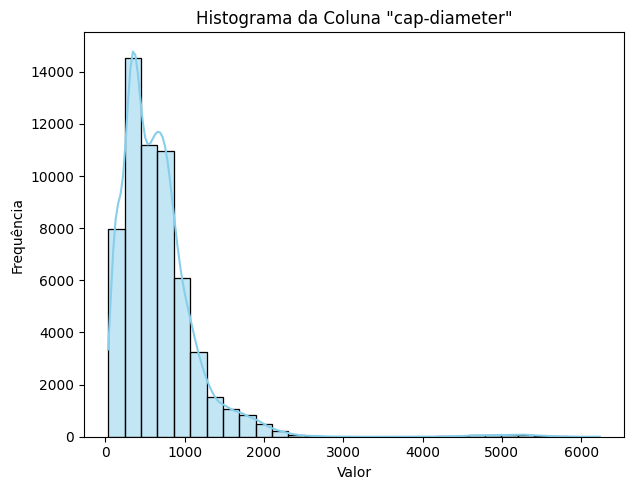

In [34]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(encoded_df['cap-diameter'], kde=True, bins=30, color='skyblue')
plt.title('Histograma da Coluna "cap-diameter"')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

### Atributo stem-height

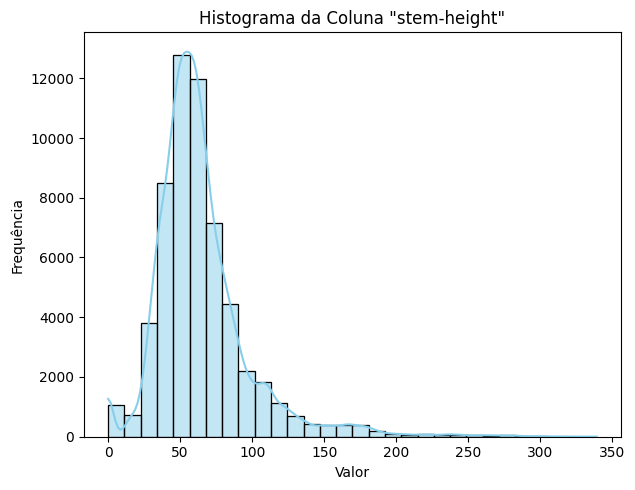

In [35]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(encoded_df['stem-height'], kde=True, bins=30, color='skyblue')
plt.title('Histograma da Coluna "stem-height"')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

### Atributo stem-width

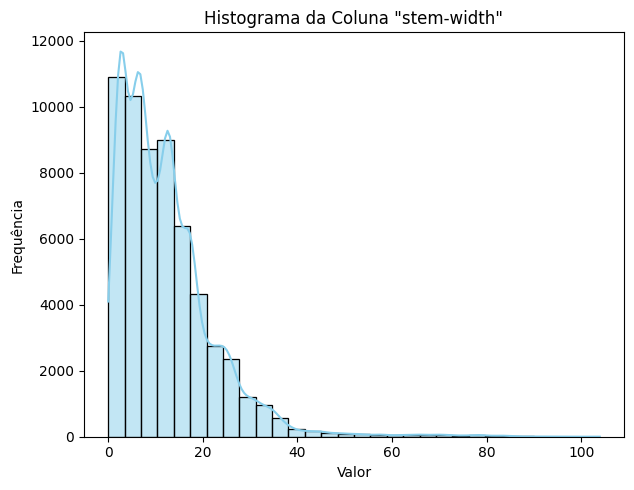

In [36]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(encoded_df['stem-width'], kde=True, bins=30, color='skyblue')
plt.title('Histograma da Coluna "stem-width"')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

Em uma análise visual é possível concluir que os atributos cap-diameter e stem-height seguem uma curva que se assemelha a normal (com a presença de poucos outliers). No entanto, o atributo stem-width não possui uma distribuição normal. Então vamos fazer as seguintes transformações nestes dados:

* para os atributos cap-diameter e stem-height vamos aplicar o transformador do tipo StandardScaler() para padronizar os dados.
* para o atributo stem-width vamos aplicar o transformador MinMaxScaler() para normalizar os dados.

In [39]:
scaler_standard = StandardScaler()
encoded_df[['cap-diameter', 'stem-height']] = scaler_standard.fit_transform(encoded_df[['cap-diameter', 'stem-height']])

scaler_minmax = MinMaxScaler()
encoded_df['stem-width'] = scaler_minmax.fit_transform(encoded_df[['stem-width']])

# Treinar modelo com o SVM depois das otimizações

Depois de feitas estas otimizações, vamos treinar novamente o nosso modelo para detectar se houve melhora no desempenho em comparação ao modelo treinado com os dados fora de escala e desnormalizados.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df, y_cleaned, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (46878, 89)
Shape of X_test: (11720, 89)
Shape of y_train: (46878, 1)
Shape of y_test: (11720, 1)


In [43]:
alg = svm.SVC()
model = alg.fit(X_train, y_train)

# predição com os mesmos dados usados para treinar
y_pred = model.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred)
print('Matriz de confusão - com os dados OTIMIZADOS usados no TREINAMENTO')
print(cm_train)
print(classification_report(y_train, y_pred))

Matriz de confusão - com os dados OTIMIZADOS usados no TREINAMENTO
[[20505   161]
 [   60 26152]]
              precision    recall  f1-score   support

           e       1.00      0.99      0.99     20666
           p       0.99      1.00      1.00     26212

    accuracy                           1.00     46878
   macro avg       1.00      0.99      1.00     46878
weighted avg       1.00      1.00      1.00     46878



Curiosidade: O modelo treinou entre 2 e 5 minutos, sinal que o SVM convergiu mais rápido desta vez graças a normalização dos dados.

In [44]:
# predição com os mesmos dados usados para testar
print('Matriz de confusão - com os dados OTIMIZADOS usados para TESTES')
y2_pred = model.predict(X_test)
cm_test = confusion_matrix(y_test, y2_pred)
print(cm_test)
print(classification_report(y_test, y2_pred))

Matriz de confusão - com os dados OTIMIZADOS usados para TESTES
[[5074   29]
 [  19 6598]]
              precision    recall  f1-score   support

           e       1.00      0.99      1.00      5103
           p       1.00      1.00      1.00      6617

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



# Conclusão

Deu para perceber que as otimizações contribuiram bastante para a performance do modelo.

Das 5103 amostras de cogumelos comestíveis, o modelo previu corretamente 5074 amostras corretamente e julgou 29 cogumelos seguros como venenosos, com uma acurácia de 99,43% de acerto.

Das 6617 amostras de cogumelos venenosos, o modelo previu corretamente 6598 amostras corretamente e julgou 19 cogumelos venenosos como seguros, com uma acurácia de 99,71% de acerto.

Comparado com o modelo anterior, houve um aumento de 10 pontos percentuais de acurácia para detecção de cogumelos seguros para comer e de 8 pontos percentuais para detecção de cogumelos venenosos.